In [2]:
import xlrd
import pandas as pd
import csv
import sqlite3
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
import os
if not os.environ.get("DISABLE_TESTING", False):
    %matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [ ]:
##Read table using pandas 
df1 = pd.read_csv("grad_rates_pupil_teacher_ratio.csv",skiprows=6)

In [5]:
df1

,County Name,County Name [Public School] 2017-18,County Name [Public School] 2016-17,Total Number of Public Schools [Public School] 2017-18,Total Number of Public Schools [Public School] 2016-17,American Indian/Alaska Native - male [Public School] 2017-18,American Indian/Alaska Native - male [Public School] 2016-17,American Indian/Alaska Native - female [Public School] 2017-18,American Indian/Alaska Native - female [Public School] 2016-17,Asian or Asian/Pacific Islander - male [Public School] 2017-18,...,Hawaiian Nat./Pacific Isl. - male [Public School] 2017-18,Hawaiian Nat./Pacific Isl. - male [Public School] 2016-17,Hawaiian Nat./Pacific Isl. - female [Public School] 2017-18,Hawaiian Nat./Pacific Isl. - female [Public School] 2016-17,Two or More Races - male [Public School] 2017-18,Two or More Races - male [Public School] 2016-17,Two or More Races - female [Public School] 2017-18,Two or More Races - female [Public School] 2016-17,Pupil/Teacher Ratio [Public School] 2017-18,Pupil/Teacher Ratio [Public School] 2016-17
0,Abbeville County SC,Abbeville County,Abbeville County,10.0,10.0,3,3,3,1,4,...,3,2,1,"=""0""",34,38,26,28,13.17,13.49
1,Acadia Parish LA,Acadia Parish,Acadia Parish,27.0,27.0,†,†,†,†,†,...,†,†,†,†,207,198,237,214,20.30,17.92
2,Accomack County VA,Accomack County,Accomack County,13.0,13.0,4,4,4,4,22,...,"=""0""",1,5,4,15,16,18,16,16.55,16.26
3,Ada County ID,Ada County,Ada County,136.0,134.0,210,224,207,221,991,...,†,163,†,166,1446,1313,1358,1240,18.99,19.25
4,Adair County IA,Adair County,Adair County,5.0,5.0,–,–,†,†,†,...,–,–,–,–,12,13,14,11,11.41,12.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Totals:,NaN,NaN,99337.0,99138.0,†,†,†,†,†,...,†,†,†,†,952629,890554,924383,860392,NaN,NaN
3139,Data Source: U.S. Department of Education Nati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3140,† indicates that the data are not applicable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3141,– indicates that the data are missing.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#create and read table using sqlite
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

#Column names end with 16 indicate school year 16-17
#Column names end with 17 indicate school year 17-18
cursor.execute("""
CREATE TABLE GRAD_RATIO(
    county_name TEXT,
    county_name_17 TEXT,
    county_name_16 TEXT,
    total_num_schools_17 INTEGER,
    total_num_schools_16 INTEGER,
    american_indian_male_17 INTEGER,
    american_indian_male_16 INTEGER,
    american_indian_female_17 INTEGER,
    american_indian_female_16 INTEGER,
    asian_male_17 INTEGER,
    asian_male_16 INTEGER,
    asian_female_17 INTEGER,
    asian_female_16 INTEGER,
    hispanic_male_17 INTEGER,
    hispanic_male_16 INTEGER,
    hispanic_female_17 INTEGER,
    hispanic_female_16 INTEGER,
    black_male_17 INTEGER,
    black_male_16 INTEGER,
    black_female_17 INTEGER,
    black_female_16 INTEGER,
    white_male_17 INTEGER,
    white_male_16 INTEGER,
    white_female_17 INTEGER,
    white_female_16 INTEGER,
    hawaiian_male_17 INTEGER,
    hawaiian_male_16 INTEGER,
    hawaiian_female_17 INTEGER,
    hawaiian_female_16 INTEGER,
    mixed_male_17 INTEGER,
    mixed_male_16 INTEGER,
    mixed_female_17 INTEGER,
    mixed_female_16 INTEGER,
    student_teacher_ratio_17 INTEGER,
    student_teacher_ratio_16 INTEGER
);""")

conn.commit()

with open ("grad_rates_pupil_teacher_ratio.csv") as grad_ratio:
    data = csv.reader(grad_ratio)
    counter = 0
    for row in data:
        if counter >= 7 and len(row)>=35:
            #print(counter)
            cursor.execute("""INSERT INTO GRAD_RATIO VALUES (?,?,?,?,?,?,?,?,?,?,
                                                             ?,?,?,?,?,?,?,?,?,?,
                                                             ?,?,?,?,?,?,?,?,?,?,
                                                             ?,?,?,?,?)""", tuple(row))
        counter += 1

        conn.commit()
            

pd.read_sql_query("SELECT * from GRAD_RATIO;", conn)

,county_name,county_name_17,county_name_16,total_num_schools_17,total_num_schools_16,american_indian_male_17,american_indian_male_16,american_indian_female_17,american_indian_female_16,asian_male_17,...,hawaiian_male_17,hawaiian_male_16,hawaiian_female_17,hawaiian_female_16,mixed_male_17,mixed_male_16,mixed_female_17,mixed_female_16,student_teacher_ratio_17,student_teacher_ratio_16
0,Abbeville County SC,Abbeville County,Abbeville County,10,10,3,3,3,1,4,...,3,2,1,"=""0""",34,38,26,28,13.17,13.49
1,Acadia Parish LA,Acadia Parish,Acadia Parish,27,27,†,†,†,†,†,...,†,†,†,†,207,198,237,214,20.3,17.92
2,Accomack County VA,Accomack County,Accomack County,13,13,4,4,4,4,22,...,"=""0""",1,5,4,15,16,18,16,16.55,16.26
3,Ada County ID,Ada County,Ada County,136,134,210,224,207,221,991,...,†,163,†,166,1446,1313,1358,1240,18.99,19.25
4,Adair County IA,Adair County,Adair County,5,5,–,–,†,†,†,...,–,–,–,–,12,13,14,11,11.41,12.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,Yuma County CO,Yuma County,Yuma County,10,10,†,†,†,†,–,...,–,–,–,–,†,†,†,†,12.76,12.76
3135,Zapata County TX,Zapata County,Zapata County,6,6,"=""0""","=""0""","=""0""","=""0""",1,...,"=""0""","=""0""","=""0""","=""0""","=""0""",1,"=""0""","=""0""",16.17,14.94
3136,Zavala County TX,Zavala County,Zavala County,8,8,1,1,1,2,2,...,"=""0""","=""0""","=""0""","=""0""",1,4,1,1,13.56,12.56
3137,Ziebach County SD,Ziebach County,Ziebach County,4,4,262,279,281,272,"=""0""",...,"=""0""","=""0""","=""0""","=""0""","=""0""","=""0""",1,2,10.59,11.02


In [7]:
#Load graduation_rate_total 
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE GRAD_RATE_TOTAL(
    region_id INTEGER,
    region_name TEXT,
    region_type TEXT,
    year INTEGER,
    variable TEXT,
    percentage REAL  
);""")

conn.commit()


with open ("graduation_rates_total.csv",encoding='latin-1') as grad_rate:
    data = csv.reader(grad_rate)
    counter = 0
    for row in data:
        if counter >= 1:
            cursor.execute("INSERT INTO GRAD_RATE_TOTAL VALUES (?,?,?,?,?,?)",tuple(row))
        counter += 1
        
conn.commit()



pd.read_sql_query("SELECT * from GRAD_RATE_TOTAL;", conn)

,region_id,region_name,region_type,year,variable,percentage
0,0500000US72011,"A?asco Municipio, Puerto Rico",county,2015,percent_high_school_graduate_or_higher,67.4
1,0500000US72011,"Aí±asco Municipio, Puerto Rico",county,2011,percent_high_school_graduate_or_higher,60.9
2,0500000US72011,"Aí±asco Municipio, Puerto Rico",county,2010,percent_high_school_graduate_or_higher,59.3
3,0500000US45001,"Abbeville County, South Carolina",county,2016,percent_high_school_graduate_or_higher,78.3
4,0500000US45001,"Abbeville County, South Carolina",county,2015,percent_high_school_graduate_or_higher,78.1
...,...,...,...,...,...,...
10528,0500000US48507,"Zavala County, Texas",county,2015,percent_high_school_graduate_or_higher,60.2
10529,0500000US48507,"Zavala County, Texas",county,2010,percent_high_school_graduate_or_higher,57.7
10530,0500000US46137,"Ziebach County, South Dakota",county,2016,percent_high_school_graduate_or_higher,85.4
10531,0500000US46137,"Ziebach County, South Dakota",county,2015,percent_high_school_graduate_or_higher,86.4


In [4]:
fin_df = pd.read_excel("financial_data.xls", sheet_name=["14","15","16","17","18"], skiprow=5)
fin_df_pps = fin_df["18"].fillna(-1)

In [6]:
# print(fin_df["18"].columns)
per_pupil_spending = pd.DataFrame([], columns=["Rank", "School System", "State", "Enrollment", "Instruction_Total", 
                              "Instruction_Salaries", "Instruction_EmployeeBenefits", "Support_Total", 
                              "Support_Pupil", "Support_Staff","Support_GeneralAdmin", "Support_SchoolAdmin"])
per_pupil_spending["Rank"] = [i for i in range(100)]
per_pupil_spending["School System"] = [i for i in fin_df_pps["Unnamed: 2"][4:] if i !="School System" and i != -1]
per_pupil_spending["State"] = [i for i in fin_df_pps["Unnamed: 3"][4:] if i !="State" and i != -1]
per_pupil_spending["Enrollment"] = [int(i) for i in fin_df_pps["Unnamed: 4"] if i != -1 and type(i) != str]
per_pupil_spending["Instruction_Total"] = [int(i) for i in fin_df_pps["Unnamed: 8"] if i != -1 and type(i) != str]
per_pupil_spending["Instruction_Salaries"] = [int(i) for i in fin_df_pps["Unnamed: 9"] if i != -1 and type(i) != str]
per_pupil_spending["Instruction_EmployeeBenefits"] = [int(i) for i in fin_df_pps["Unnamed: 10"] if i != -1 and type(i) != str]
per_pupil_spending["Support_Total"] = [int(i) for i in fin_df_pps["Unnamed: 11"] if i != -1 and type(i) != str]
per_pupil_spending["Support_Pupil"] = [int(i) for i in fin_df_pps["Unnamed: 12"] if i != -1 and type(i) != str]
per_pupil_spending["Support_Staff"] = [int(i) for i in fin_df_pps["Unnamed: 13"] if i != -1 and type(i) != str]
per_pupil_spending["Support_GeneralAdmin"] = [int(i) for i in fin_df_pps["Unnamed: 14"] if i != -1 and type(i) != str]
per_pupil_spending["Support_SchoolAdmin"] = [int(i) for i in fin_df_pps["Unnamed: 15"] if i != -1 and type(i) != str]

# per_pupil_spending.to_csv(index=False)

In [10]:
#Finance sheet 17
fin_df_percent_dist_rev = fin_df["17"].fillna(-1)

In [ ]:
percent_dist_rev = pd.DataFrame([], columns=["Rank","School System","State","Enrollment","Overall Total Percentage",
                                             "Federal Total Percentage","Federal Title I","State Total Percentage",
                                             "State General Formula Assistance","Local Total Percentage",
                                             "Local Taxes Parent Government Contributions","Other Local Government",
                                            "Charges"])

percent_dist_rev["Rank"] = [i for i in range(100)]
percent_dist_rev["School System"] = [i for i in fin_df_percent_dist_rev["Unnamed: 2"][4:] if i !="School System" and i != -1]
percent_dist_rev["State"] = [i for i in fin_df_percent_dist_rev["Unnamed: 3"][4:] if i !="State" and i != -1]
percent_dist_rev["Enrollment"] = [int(i) for i in fin_df_percent_dist_rev["Unnamed: 4"] if i != -1 and type(i) != str]
percent_dist_rev["Overall Total Percentage"] = [float(i) for i in fin_df_percent_dist_rev["Unnamed: 5"][4:] if i !="Total" and i != -1]
percent_dist_rev["Federal Total Percentage"] = [float(i) for i in (fin_df_percent_dist_rev["Unnamed: 6"]) if i !="Federal sources" and i != "Total2" and i != -1]
percent_dist_rev["Federal Title I"] = [float(i) for i in (fin_df_percent_dist_rev["Unnamed: 7"]) if i !="Federal sources" and i != "Title I" and i != -1]
percent_dist_rev["State Total Percentage"] = [float(i) for i in (fin_df_percent_dist_rev["Unnamed: 8"]) if i !="State sources" and i != "Total2" and i != -1]
percent_dist_rev["State General Formula Assistance"] = [float(i) for i in (fin_df_percent_dist_rev["Unnamed: 9"]) if i !="State sources" and i != "General" and i !="formula" and i != "assistance" and i != -1]
percent_dist_rev["Local Total Percentage"] = [float(i) for i in (fin_df_percent_dist_rev["Unnamed: 10"]) if i !="Local sources" and i != "Total2" and i != -1]

#This function changes the (Z) to zeros  
def changeZ(i):
    try:
        return (float(i))
    except:
        return(0.0)

percent_dist_rev["Local Taxes Parent Government Contributions"] = [changeZ(i) for i in (fin_df_percent_dist_rev["Unnamed: 11"]) if i !="Local sources" and i != -1 and i!="Taxes and" and i != "parent" and i != "government" and i != "contributions"]
percent_dist_rev["Other Local Government"] = [changeZ(i) for i in (fin_df_percent_dist_rev["Unnamed: 12"]) if i !="Local sources" and i != -1 and i!="Other" and i != "local" and i != "governments"]
percent_dist_rev["Charges"] = [changeZ(i) for i in (fin_df_percent_dist_rev["Unnamed: 13"]) if i !="Local sources" and i != -1 and i!="Charges"]


percent_dist_rev.to_csv(index=False)

In [14]:
#Finance sheet 16
fin_df_expenditure = fin_df["16"].fillna(-1)
fin_df_expenditure

,Table 16. Expenditure of the 100 Largest Public Elementary-Secondary School Systems in the United,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,States by Enrollment: Fiscal Year 2017,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,(Thousand dollars. Detail may not add to total...,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Rank,-1.0,School System,State,-1,Elementary-secondary expenditure,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
292,Notes: See Appendix B for a descript...,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
293,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
294,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
#Finance Sheet 16
expenditure = pd.DataFrame([], columns=["Rank","School System","State","Enrollment",
                                       "Elementary_secondary Expenditure Total", "Selected Objects Salaries",
                                       "Selected Objects Employee Benfits","Instruction Salaries","Instruction Employee Benefits",
                                       "Support Services Pupil Support","Support Services Instructive Staff Support",
                                       "Support Services General Administration","Support Services School Administration",
                                       "Support Services Other and Nonspecified","Other Current Spending","Capital Outlay",
                                       "Inter-governmental","Interest On Debt"])

expenditure["Rank"] = [i for i in range(100)]
expenditure["School System"] = percent_dist_rev["School System"]
expenditure["State"] = percent_dist_rev["State"]
expenditure["Enrollment"] = percent_dist_rev["Enrollment"]
expenditure["Elementary_secondary Expenditure Total"] = [int(i) for i in fin_df_expenditure["Unnamed: 5"][np.concatenate((np.arange(4,74,1),np.arange(149,217,1)))] if i !="Total" and i != -1 and i != "Elementary-secondary expenditure"]
expenditure["Selected Objects Salaries"] = [int(i) for i in fin_df_expenditure["Unnamed: 7"][np.concatenate((np.arange(4,74,1),np.arange(149,217,1)))] if i !="For selected objects" and i != -1 and i != "Salaries and" and i != "wages"]
expenditure["Selected Objects Employee Benfits"] = [int(i) for i in fin_df_expenditure["Unnamed: 8"][np.concatenate((np.arange(4,74,1),np.arange(149,217,1)))] if i != -1 and i != "Employee" and i != "benefits"]
expenditure["Instruction Salaries"] = [int(i) for i in fin_df_expenditure["Unnamed: 10"][np.concatenate((np.arange(4,74,1),np.arange(149,217,1)))] if i != -1 and i != "Salaries and" and i != "wages"]
expenditure["Instruction Employee Benefits"] = [int(i) for i in fin_df_expenditure["Unnamed: 11"][np.concatenate((np.arange(4,74,1),np.arange(149,217,1)))] if i != -1 and i != "Employee" and i != "benefits"]
expenditure["Support Services Pupil Support"] = [int(i) for i in fin_df_expenditure["Unnamed: 5"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Pupil" and i != "support"]
expenditure["Support Services Instructive Staff Support"] = [int(i) for i in fin_df_expenditure["Unnamed: 6"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Instructional" and i != "staff" and i != "support"]
expenditure["Support Services General Administration"] = [int(i) for i in fin_df_expenditure["Unnamed: 7"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "General" and i != "adminis-" and i != "tration"]
expenditure["Support Services School Administration"] = [int(i) for i in fin_df_expenditure["Unnamed: 8"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "School" and i != "adminis-" and i != "tration"]
expenditure["Support Services Other and Nonspecified"] = [int(i) for i in fin_df_expenditure["Unnamed: 9"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Other and" and i != "nonspecified"]
expenditure["Other Current Spending"] = [int(i) for i in fin_df_expenditure["Unnamed: 10"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Other" and i != "current" and i != "spending"]
expenditure["Capital Outlay"] = [int(i) for i in fin_df_expenditure["Unnamed: 11"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Capital" and i != "outlay"]
expenditure["Inter-governmental"] = [int(i) for i in fin_df_expenditure["Unnamed: 12"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Inter-" and i != "governmental"]
expenditure["Interest On Debt"] = [int(i) for i in fin_df_expenditure["Unnamed: 13"][np.concatenate((np.arange(76,145,1),np.arange(220,288,1)))] if i != -1 and i != "Interest" and i != "on debt"]


expenditure.to_csv(index=False)

In [3]:
# Grad Rates by Race

grad= pd.read_csv("grad_rates_by_race.csv", sep="\t", lineterminator="\r")

In [4]:
import re

selected_cols = ['State']
for i in range(10,len(grad.columns)):
#     print(grad[grad.columns[i]].isna().sum())
    if grad[grad.columns[i]].isna().sum() != 77: selected_cols += [grad.columns[i]]
# grad_parsed = grad[selected_cols]

selected_rows = []
for i in range(len(grad)-13):
#     print(grad[i:i+1].isna().sum().sum())
    if (grad[i:i+1].isna().sum().sum() != 25): selected_rows += [i]

grad_parsed = grad[selected_cols].iloc[selected_rows].reset_index()
grad_parsed = grad_parsed.drop('index', axis=1).drop([3], axis=0)

header = ["State","Total", "White", "Black", "Hispanic", "Asian/Pacific Islander", "Asian", "Pacific Islander", 
          "American Indian/Alaska/Native", "Two or more races", "Students with Disabilities", 
          "Limited English", "Economically disadvantaged"]

grad_parsed.columns = header
grad_parsed = grad_parsed[3:].reset_index().drop('index', axis=1)

states=[]
for i in grad_parsed['State']:
    states += [re.sub("[^a-zA-Z]+", "", i)]
grad_parsed["State"] = states

grad_parsed.to_csv('grad_rates_by_race_parsed.csv', index=False)

In [5]:
agcr = pd.read_csv('grad_rates_by_race_parsed.csv')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

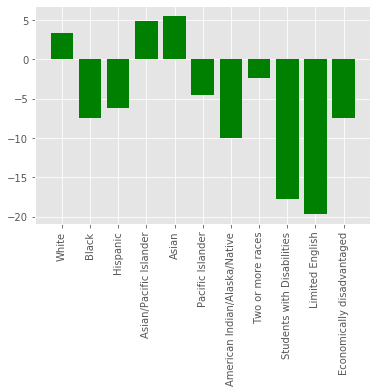

In [6]:
means_by_dem = dict()
for col in range(2,len(agcr.columns)):
    ok = []
    for row in range(len(agcr)):
        if type(agcr.iloc[row,col]) == np.int64 or agcr.iloc[row,col].isdigit(): 
            ok += [int(agcr.iloc[row,col]) - agcr.iloc[row,1]]
    means_by_dem[agcr.columns[col]] = np.mean(ok)

# Average difference in percentage between racial demographic and total
means_by_dem

plt.bar(means_by_dem.keys(), means_by_dem.values(), color='g')
plt.xticks(rotation=90)